In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sumithsathya","key":"1159e9345ac94a8c2a643bbef1e140f1"}'}

In [ ]:
! mkdir  ~/.kaggle

In [ ]:

! mv kaggle.json ~/.kaggle

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
utkarshxy/who-worldhealth-statistics-2020-complete             World Health 2020 🌏 | For Geospatial Analysis         1MB  2021-01-06 16:22:50            892  
gpreda/pfizer-vaccine-tweets                                   Pfizer Vaccine Tweets                               403KB  2021-01-06 15:11:07            674  
google/android-smartphones-high-accuracy-datasets              Android smartphones high accuracy GNSS datasets       1GB  2020-12-23 01:51:11            127  
ashkhagan/women-representation-in-city-property-sanfrancisco   Women Representation in City Property SanFrancisco    3KB  2020-12-13 05:18:14            135  
arashnic/covid19-case-surveillance-public-use-

In [ ]:
!kaggle datasets download -d puneet6060/intel-image-classification

 93% 322M/346M [00:02<00:00, 159MB/s]
100% 346M/346M [00:02<00:00, 150MB/s]


In [ ]:
!ls

drive  intel-image-classification.zip  sample_data


In [ ]:
!mkdir intel

In [ ]:
! unzip intel-image-classification.zip -d intel

Streaming output truncated to the last 5000 lines.
  inflating: intel/seg_train/seg_train/mountain/7506.jpg  
  inflating: intel/seg_train/seg_train/mountain/7537.jpg  
  inflating: intel/seg_train/seg_train/mountain/7539.jpg  
  inflating: intel/seg_train/seg_train/mountain/7551.jpg  
  inflating: intel/seg_train/seg_train/mountain/7560.jpg  
  inflating: intel/seg_train/seg_train/mountain/7565.jpg  
  inflating: intel/seg_train/seg_train/mountain/7578.jpg  
  inflating: intel/seg_train/seg_train/mountain/7581.jpg  
  inflating: intel/seg_train/seg_train/mountain/7586.jpg  
  inflating: intel/seg_train/seg_train/mountain/7647.jpg  
  inflating: intel/seg_train/seg_train/mountain/7652.jpg  
  inflating: intel/seg_train/seg_train/mountain/7654.jpg  
  inflating: intel/seg_train/seg_train/mountain/7662.jpg  
  inflating: intel/seg_train/seg_train/mountain/767.jpg  
  inflating: intel/seg_train/seg_train/mountain/7672.jpg  
  inflating: intel/seg_train/seg_train/mountain/7679.jpg  
  infl

In [ ]:

!ls

drive  intel  intel-image-classification.zip  sample_data


In [ ]:
!ls ./intel

seg_pred  seg_test  seg_train


In [ ]:
!ls ./intel/seg_train/seg_train

buildings  forest  glacier  mountain  sea  street


In [ ]:
!ls ./intel/seg_test/seg_test

buildings  forest  glacier  mountain  sea  street


In [ ]:
PATH = "./intel/"

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,Softmax
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_dir = os.path.join(PATH,'seg_train/seg_train')
validation_dir = os.path.join(PATH, 'seg_test/seg_test')

In [ ]:

train_buildings_dir = os.path.join(train_dir, 'buildings')  # directory with our training daisy pictures
train_forest_dir = os.path.join(train_dir, 'forest')  # directory with our training dandelion pictures
train_glacier_dir = os.path.join(train_dir, 'glacier')  # directory with our training rose pictures
train_mountain_dir = os.path.join(train_dir, 'mountain')  # directory with our training sunflower pictures
train_sea_dir = os.path.join(train_dir, 'sea')  # directory with our training tulip pictures
train_street_dir = os.path.join(train_dir, 'street')

In [ ]:
validation_buildings_dir = os.path.join(validation_dir, 'buildings')  # directory with our training daisy pictures
validation_forest_dir = os.path.join(validation_dir, 'forest')  # directory with our training dandelion pictures
validation_glacier_dir = os.path.join(validation_dir, 'glacier')  # directory with our training rose pictures
validation_mountain_dir = os.path.join(validation_dir, 'mountain')  # directory with our training sunflower pictures
validation_sea_dir = os.path.join(validation_dir, 'sea')  # directory with our training tulip pictures
validation_street_dir = os.path.join(validation_dir, 'street')

In [ ]:
num_buildings_tr = len(os.listdir(train_buildings_dir))
num_glacier_tr = len(os.listdir(train_glacier_dir))

num_buildings_val = len(os.listdir(validation_buildings_dir))
num_glacier_val = len(os.listdir(validation_glacier_dir))

In [ ]:
print('total training buildings images:', num_buildings_tr)
print('total training glacier images:', num_glacier_tr)

print('total validation buildings images:', num_buildings_val)
print('total validation glacier images:', num_glacier_val)

total training buildings images: 2191
total training glacier images: 2404
total validation buildings images: 437
total validation glacier images: 553


In [ ]:
batch_size = 128
epochs = 100
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='sparse')

Found 14034 images belonging to 6 classes.


In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='sparse')

Found 3000 images belonging to 6 classes.


In [ ]:
sample_training_images, _ = next(train_data_gen)

In [ ]:

# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

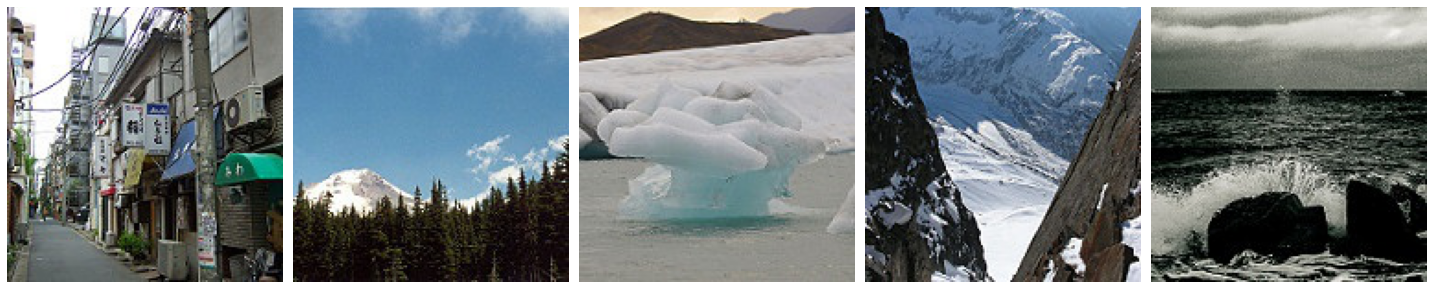

In [ ]:
plotImages(sample_training_images[6:11])

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(6,activation='softmax')])

In [ ]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               5308544   
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 7

In [ ]:
epochs = 100
history = model.fit(
    train_data_gen,
    steps_per_epoch=14034 // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=3000 // batch_size
)

Epoch 1/100
109/109 [==============================] - 26s 173ms/step - loss: 1.6118 - accuracy: 0.4475 - val_loss: 0.7946 - val_accuracy: 0.7181
Epoch 2/100
109/109 [==============================] - 18s 167ms/step - loss: 0.6989 - accuracy: 0.7518 - val_loss: 0.6810 - val_accuracy: 0.7605
Epoch 3/100
109/109 [==============================] - 18s 164ms/step - loss: 0.5455 - accuracy: 0.8100 - val_loss: 0.6427 - val_accuracy: 0.7588
Epoch 4/100
109/109 [==============================] - 18s 163ms/step - loss: 0.4134 - accuracy: 0.8674 - val_loss: 0.6061 - val_accuracy: 0.8006
Epoch 5/100
109/109 [==============================] - 18s 162ms/step - loss: 0.3176 - accuracy: 0.8972 - val_loss: 0.6210 - val_accuracy: 0.7935
Epoch 6/100
109/109 [==============================] - 18s 163ms/step - loss: 0.2117 - accuracy: 0.9352 - val_loss: 0.7132 - val_accuracy: 0.7802
Epoch 7/100
109/109 [==============================] - 18s 162ms/step - loss: 0.1507 - accuracy: 0.9574 - val_loss: 0.7544 -

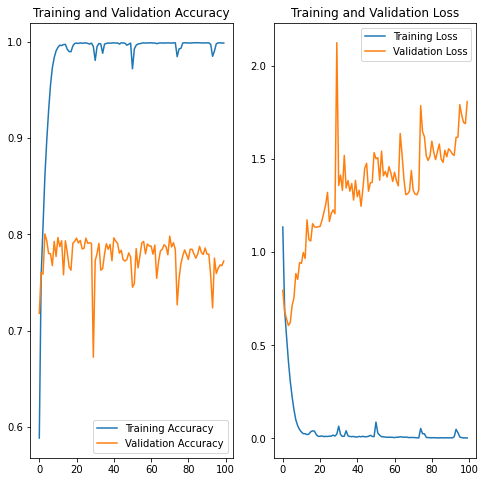

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()